In [2]:
import pandas as pd


### machine learning

In [ ]:
population_clean = pd.read_csv(r'population_clean.csv')

In [ ]:
population_clean.sample(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,...,Others of concern,Total forced displacements,Continent_of_Asylum,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
69240,2010,Ethiopia,ETH,Canada,CAN,1761,245,0,0,0,...,0,2006,Americas,Northern America,Africa,Eastern Africa,-95.00,60.0000,38.0000,8.0000
119433,1992,Ghana,GHA,Burkina Faso,BFA,60,0,0,0,0,...,0,60,Africa,Western Africa,Africa,Western Africa,-2.00,13.0000,-2.0000,8.0000
4841,2023,Sudan,SDN,Gabon,GAB,5,0,0,0,0,...,0,5,Africa,Middle Africa,Africa,Northern Africa,11.75,-1.0000,30.0000,15.0000
116923,1994,Afghanistan,AFG,Kazakhstan,KAZ,2000,0,0,0,0,...,0,2000,Asia,Central Asia,Asia,Southern Asia,68.00,48.0000,65.0000,33.0000
7868,2022,Gambia,GMB,Belgium,BEL,35,120,0,0,0,...,0,155,Europe,Western Europe,Africa,Western Africa,4.00,50.8333,-16.5667,13.4667


In [ ]:
population_clean['Continent_of_Asylum'].unique()

array(['Europe', 'Asia', 'Africa', 'Americas', 'Oceania', nan],
      dtype=object)

In [ ]:
def get_continent_df(continent):
    return pd.DataFrame(population_clean[population_clean['Continent_of_Asylum'] == continent].groupby(['Year']).sum()['Total forced displacements'])


In [ ]:
europe = get_continent_df('Europe')
asia = get_continent_df('Asia')
africa = get_continent_df('Africa')
americas = get_continent_df('Americas')
oceania = get_continent_df('Oceania')


/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_7644/2453109939.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_7644/2453109939.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_7644/2453109939.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/wx/89cqn4pd7sj7hylxyj59ftk0000

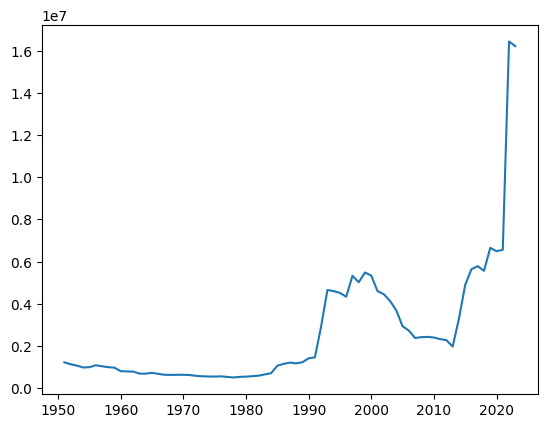

In [ ]:
plt.plot(europe.index, europe['Total forced displacements'], label='Ventas de Shampoo')

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print(f"p-value for zeroth order differencing: {adfuller(europe['Total forced displacements'])[1]}")
print(f"p-value for first order differencing: {adfuller(europe['Total forced displacements'].diff().dropna())[1]}")
print(f"p-value for second order differencing: {adfuller(europe['Total forced displacements'].diff().diff().dropna())[1]}")


p-value for zeroth order differencing: 0.9851082892936008
p-value for first order differencing: 0.9403388434754643
p-value for second order differencing: 0.13549836260033904


In [ ]:
print(f"p-value for third order differencing: {adfuller(europe['Total forced displacements'].diff().diff().diff().dropna())[1]}")

p-value for third order differencing: 1.8775415494321352e-07


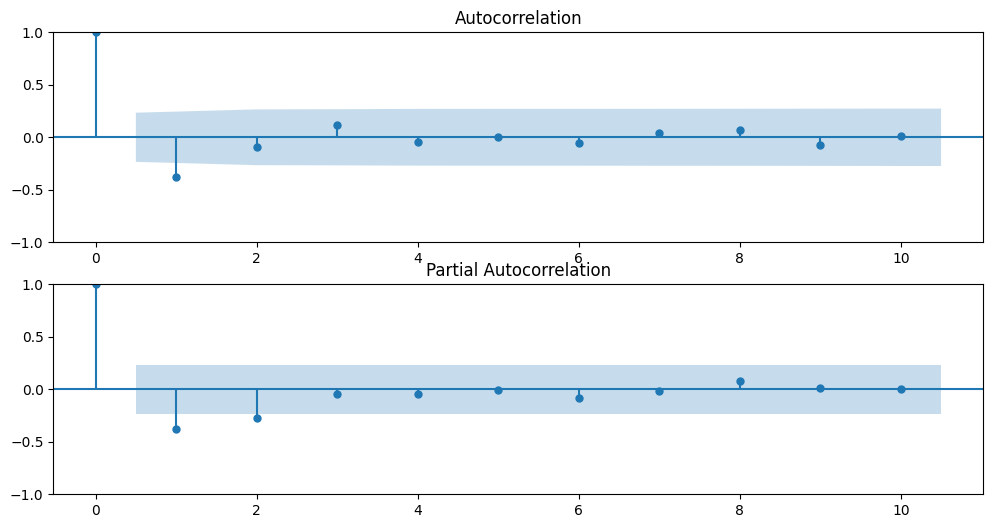

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aplicar la tercera diferenciación
europe_diff = europe['Total forced displacements'].diff().diff().diff().dropna()

# Graficar la autocorrelación y autocorrelación parcial
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(europe_diff, lags=10, ax=plt.gca(), title='Autocorrelation')

plt.subplot(2, 1, 2)
plot_pacf(europe_diff, lags=10, ax=plt.gca(), title='Partial Autocorrelation')

plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
europe.index.freq = 'AS'
model = ARIMA(europe, order=(1, 3, 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [ ]:
model_fit = model.fit()

In [ ]:
# Mostrar resumen del modelo
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(1, 3, 1)   Log Likelihood               -1090.905
Date:                        Fri, 24 Nov 2023   AIC                           2187.809
Time:                                12:39:38   BIC                           2194.555
Sample:                                     0   HQIC                          2190.489
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9216      0.247     -3.729      0.000      -1.406      -0.437
ma.L1         -0.9605      0.224     -4.290      0.000      -1.399 

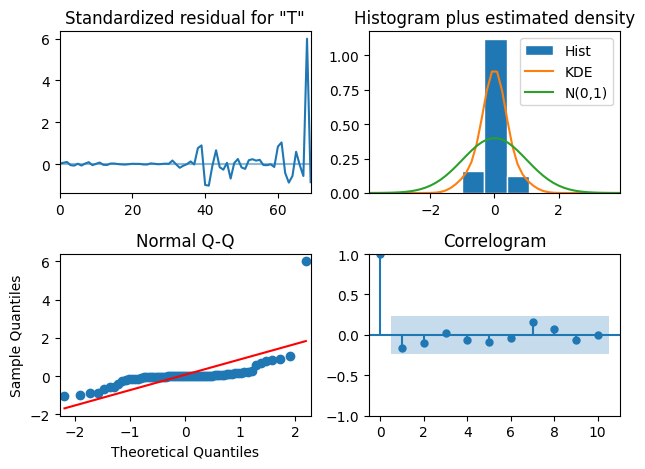

In [ ]:
# Calcular el error
model_fit.plot_diagnostics()
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



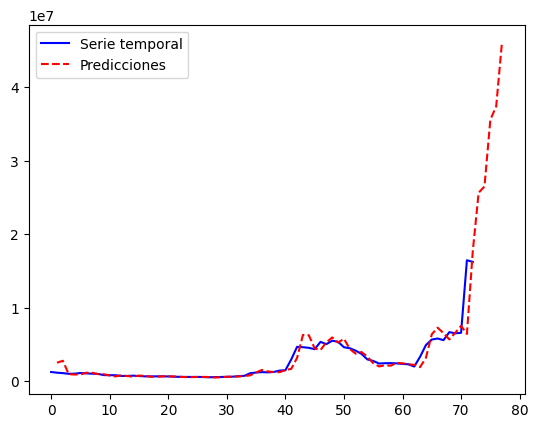

In [ ]:
predictions = model_fit.predict()
fig, ax = plt.subplots()
ax.plot(range(len(europe)), europe.values, 'b-')
ax.plot(range(1,len(europe)+5), pd.concat([predictions[1:],model_fit.forecast(5)]), 'r--')
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()